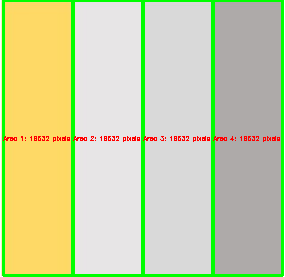

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_areas_and_display(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Define the ROIs (rectangular regions) for each color bar
    rois = [
        (3, 0, 72, 275),  # Coordinates for the first color bar
        (73, 0, 142, 275),  # Coordinates for the second color bar
        (143, 0, 212, 275),  # Coordinates for the third color bar
        (213, 0, 282, 275)  # Coordinates for the fourth color bar
    ]

    # Initialize a list to store areas
    areas = []

    # Loop through each ROI to calculate areas
    for i, (x1, y1, x2, y2) in enumerate(rois):
        # Crop the image to the ROI
        roi_image = image[y1:y2, x1:x2]

        # Convert the ROI to grayscale
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)

        # Apply a threshold to create a binary image
        _, thresh = cv2.threshold(gray_roi, 128, 255, cv2.THRESH_BINARY)

        # Find contours in the binary image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the total area of all contours in the ROI
        total_area = sum(cv2.contourArea(contour) for contour in contours)

        # Append the total area to the areas list
        areas.append(total_area)

        # Draw a rectangle around the ROI
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the area at the center of the ROI
        area_text = f"Area {i + 1}: {int(total_area)} pixels"
        text_size = cv2.getTextSize(area_text, cv2.FONT_HERSHEY_SIMPLEX, 0.2, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y1 + (y2 - y1 + text_size[1]) // 2
        cv2.putText(image, area_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0, 0, 255), 1)

    # Display the image with areas marked
    cv2_imshow(image)

# Test the function with your image
image_path = '/content/drive/MyDrive/pics/bar.PNG'  # Provide the path to your image
calculate_areas_and_display(image_path)
